In [19]:
# Name : Taukir Shekh[19DCS134]
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Datasets
 Admission_Predict.csv          data.csv
 Admission_Predict_Ver1.1.csv   dataset_31_credit-g.csv
'Copy of data.csv'             'default of credit card clients (1).xlsx'
 cwurData.csv                   DS1.xlsx


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import pickle

In [21]:
df=pd.read_csv('dataset_31_credit-g.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [22]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,2,1,7,142,4,3,3,3,2,3,2,48,1,1,1,3,0,1,1,1
1,0,29,3,7,770,2,0,1,0,2,1,2,3,1,1,0,3,0,0,1,0
2,3,8,1,4,390,2,1,1,3,2,2,2,30,1,1,0,2,1,0,1,1
3,1,26,3,5,848,2,1,1,3,1,3,0,26,1,0,0,3,1,0,1,1
4,1,17,2,1,734,2,0,2,3,2,3,1,34,1,0,1,3,1,0,1,0


In [23]:
find='class'
y=df[find]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [24]:
x=df.drop(find,inplace=False, axis=1)
x.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,2,1,7,142,4,3,3,3,2,3,2,48,1,1,1,3,0,1,1
1,0,29,3,7,770,2,0,1,0,2,1,2,3,1,1,0,3,0,0,1
2,3,8,1,4,390,2,1,1,3,2,2,2,30,1,1,0,2,1,0,1
3,1,26,3,5,848,2,1,1,3,1,3,0,26,1,0,0,3,1,0,1
4,1,17,2,1,734,2,0,2,3,2,3,1,34,1,0,1,3,1,0,1


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [26]:
x_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
847,3,17,3,1,174,2,2,3,2,2,1,2,9,1,1,0,3,0,0,1
986,2,26,4,3,786,2,2,1,1,2,0,0,14,1,1,1,3,0,0,1
279,3,17,3,7,346,0,0,3,3,2,3,3,10,1,2,0,0,0,1,1
965,0,21,3,7,308,4,0,3,0,2,0,3,7,1,1,0,3,0,0,1
344,2,6,3,1,672,2,2,0,3,1,0,0,18,1,1,0,2,1,0,1


In [27]:
x_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
929,1,8,2,1,209,2,0,3,3,2,1,2,24,1,1,1,2,1,0,1
959,0,17,3,5,565,0,3,3,3,2,3,1,11,1,0,0,3,0,0,1
769,3,8,1,7,303,2,3,1,3,2,3,2,44,1,1,1,2,0,1,1
776,3,23,1,1,621,2,1,3,3,2,3,3,18,1,1,1,3,0,1,1
457,1,8,3,2,601,2,3,2,3,2,3,1,16,1,0,0,3,0,1,1


In [28]:
y_train.head()

847    1
986    1
279    1
965    1
344    1
Name: class, dtype: int64

In [29]:
y_test.head()

929    1
959    1
769    1
776    1
457    0
Name: class, dtype: int64

In [30]:
f1_arr = []
ran=20
n_neigh = [i for i in range(2,ran)]
for i in range(2,ran):
  model=KNeighborsClassifier(n_neighbors=i,algorithm='auto')
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  f1_arr.append(f1_score(y_test,y_pred,average='weighted'))
  print("The F1 score obtained when n_neighbours : {} is {}".format(i,f1_score(y_test,y_pred,average='weighted')))

The F1 score obtained when n_neighbours : 2 is 0.5650189551548774
The F1 score obtained when n_neighbours : 3 is 0.6076673596673597
The F1 score obtained when n_neighbours : 4 is 0.6140937029953017
The F1 score obtained when n_neighbours : 5 is 0.5870573336802845
The F1 score obtained when n_neighbours : 6 is 0.5809185520361991
The F1 score obtained when n_neighbours : 7 is 0.5701520045172219
The F1 score obtained when n_neighbours : 8 is 0.5809108789986699
The F1 score obtained when n_neighbours : 9 is 0.5731849062140814
The F1 score obtained when n_neighbours : 10 is 0.5903853262002362
The F1 score obtained when n_neighbours : 11 is 0.5882109233479739
The F1 score obtained when n_neighbours : 12 is 0.5944894167225361
The F1 score obtained when n_neighbours : 13 is 0.6008
The F1 score obtained when n_neighbours : 14 is 0.5944894167225361
The F1 score obtained when n_neighbours : 15 is 0.5657475885876738
The F1 score obtained when n_neighbours : 16 is 0.5706324786324787
The F1 score ob

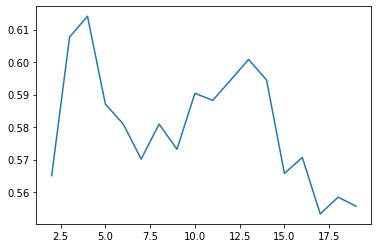

In [31]:
plt.plot(n_neigh, f1_arr)

In [32]:
df.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.582000,13.718000,2.219000,4.12500,447.940000,2.1450,1.525000,1.973000,1.878000,1.866000,1.845000,1.714000,16.521000,0.908000,1.071000,0.407000,2.312000,0.155000,0.404000,0.963000,0.700000
std,1.253334,7.522703,1.064035,2.47457,264.627368,1.1114,1.344315,1.118715,1.350904,0.445244,1.103718,1.154789,11.294473,0.421561,0.531264,0.577654,1.071356,0.362086,0.490943,0.188856,0.458487
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,1.000000,2.00000,218.750000,2.0000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,13.000000,3.000000,5.00000,439.500000,2.0000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,14.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,17.000000,3.000000,7.00000,676.250000,2.0000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,32.000000,4.000000,9.00000,920.000000,4.0000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,52.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# svm_clf=LinearSVC()
svm_clf=LinearSVC(multi_class='crammer_singer')
svm_clf.fit(x_train, y_train)
y_pred=svm_clf.predict(x_test)
svm_clf_F1=f1_score(y_test,y_pred,average='weighted')
print("SVM Classifier F1 Score is ",svm_clf_F1,"\n")

SVM Classifier F1 Score is  0.4327517286743354 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [34]:
import pickle
sm=pickle.dumps(svm_clf)
svm2=pickle.loads(sm)

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
gn_f1=f1_score(y_test,y_pred,average='weighted')
print(gn_f1)

0.7030692853246044
